In [1]:
import pandas as pd 
import numpy as np 
import pickle 
import matplotlib.pyplot as plt 
from scipy import stats 
#import tensorflow as tf 
import seaborn as sns 
from sklearn import metrics 

In [2]:
import os
os.chdir("D:/MScAI/Semester1/CS5062MachineLearning/AssessmII/CS5062_AssessmentII_Dataset/")

In [3]:
X_train_path = "D:/MScAI/Semester1/CS5062MachineLearning/AssessmII/CS5062_AssessmentII_Dataset/train/X_train/"
X_test_path = "D:/MScAI/Semester1/CS5062MachineLearning/AssessmII/CS5062_AssessmentII_Dataset/test/X_test/"

In [4]:
#Loading training data from files
X_filelist = os.listdir(X_train_path)
print(X_filelist)        

X_train=list()
for name in X_filelist:
    data = pd.read_csv(X_train_path+name, header=None, delim_whitespace=True)
    X_train.append(data)
# stack group so that features are the 3rd dimension
X_train = np.dstack(X_train)
X_train[0:5]
X_train.shape

['acc_x_train.txt', 'acc_y_train.txt', 'acc_z_train.txt', 'gyro_x_train.txt', 'gyro_y_train.txt', 'gyro_z_train.txt']


(7352, 128, 6)

In [5]:
y_train_df = pd.read_csv("D:/MScAI/Semester1/CS5062MachineLearning/AssessmII/CS5062_AssessmentII_Dataset/train/y_train.txt", header=None)
#print(y_train_df)
print(y_train_df.shape)

(7352, 1)


In [6]:
#Loading testing data from files
X_filelist = os.listdir(X_test_path)
print(X_filelist)        

X_test=list()
for name in X_filelist:
    data = pd.read_csv(X_test_path+name, header=None, delim_whitespace=True)
    X_test.append(data)
# stack group so that features are the 3rd dimension
X_test = np.dstack(X_test)
X_test[0:5]
X_test.shape

['acc_x_test.txt', 'acc_y_test.txt', 'acc_z_test.txt', 'gyro_x_test.txt', 'gyro_y_test.txt', 'gyro_z_test.txt']


(2947, 128, 6)

In [7]:
y_test_df = pd.read_csv("D:/MScAI/Semester1/CS5062MachineLearning/AssessmII/CS5062_AssessmentII_Dataset/test/y_test.txt", header=None)
#print(y_test_df)
print(y_test_df.shape)

(2947, 1)


In [8]:
y_train = np.array(y_train_df)
y_test = np.array(y_test_df)

In [9]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

# Bidirectional LSTM model

In [13]:
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
#from keras.layers import TimeDistributed
from keras.layers import Bidirectional
#from keras.utils import to_categorical

In [14]:
model = Sequential()
model.add(Bidirectional(LSTM(
          units=128,
          input_shape=[X_train.shape[1], X_train.shape[2]])))
model.add(Dropout(rate=0.5))

model.add(Dense(units=128, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['acc'])

In [15]:
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=64,
    validation_data=(X_test, y_test))


Train on 7352 samples, validate on 2947 samples
Epoch 1/25
7352/7352 [==============================] - 20s 3ms/step - loss: 1.0647 - acc: 0.5457 - val_loss: 0.8719 - val_acc: 0.6189
Epoch 2/25
7352/7352 [==============================] - 21s 3ms/step - loss: 0.7928 - acc: 0.6683 - val_loss: 0.6836 - val_acc: 0.7170
Epoch 3/25
7352/7352 [==============================] - 22s 3ms/step - loss: 0.5998 - acc: 0.7564 - val_loss: 0.6456 - val_acc: 0.7418
Epoch 4/25
7352/7352 [==============================] - 22s 3ms/step - loss: 0.5793 - acc: 0.7745 - val_loss: 0.7574 - val_acc: 0.6692
Epoch 5/25
7352/7352 [==============================] - 22s 3ms/step - loss: 0.4886 - acc: 0.8020 - val_loss: 0.5357 - val_acc: 0.8032
Epoch 6/25
7352/7352 [==============================] - 21s 3ms/step - loss: 0.3349 - acc: 0.8794 - val_loss: 0.6550 - val_acc: 0.7900
Epoch 7/25
7352/7352 [==============================] - 22s 3ms/step - loss: 0.3214 - acc: 0.8813 - val_loss: 0.4305 - val_acc: 0.8521
Epoch 

In [16]:
model.evaluate(X_test, y_test)

2947/2947 [==============================] - 3s 882us/step


[0.40955591633660554, 0.8944689631462097]

In [19]:
 #list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


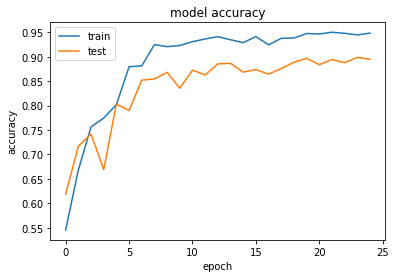

In [20]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

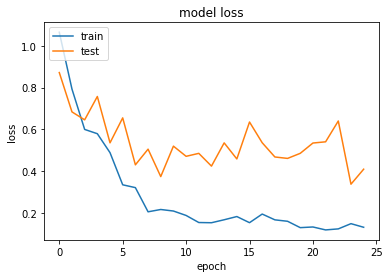

In [21]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [23]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_test_arr = np.argmax(y_test, axis=-1)
print(y_pred[0:5], y_test_arr[0:5])

[4 4 4 4 4] [4 4 4 4 4]


In [24]:
cm = confusion_matrix(y_test_arr, y_pred)

In [27]:
def plot_conf_matr(cm, classes, normalize = False, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=90)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
        
    print(cm)
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[444   1  50   0   1   0]
 [  0 438  29   0   4   0]
 [  4   1 414   1   0   0]
 [  0  17   0 412  62   0]
 [  0   3   1 111 417   0]
 [  0  26   0   0   0 511]]


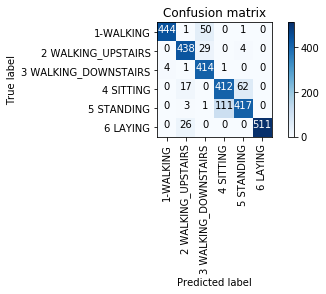

In [28]:
cm_plot_labels = ['1-WALKING', '2 WALKING_UPSTAIRS','3 WALKING_DOWNSTAIRS',
                  '4 SITTING', '5 STANDING', '6 LAYING']
plot_conf_matr(cm, cm_plot_labels)

In [29]:
tp = sum(cm[i][i] for i in range(len(cm)))
fp = np.triu(cm).sum()-np.trace(cm)
fn = np.tril(cm).sum()-np.trace(cm)

recall=tp/(tp+fn)
precision=tp/(tp+fp) 
print("recall    ", recall)
print("precision ", precision) 

recall     0.9417649160414434
precision  0.9468390804597702


In [30]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

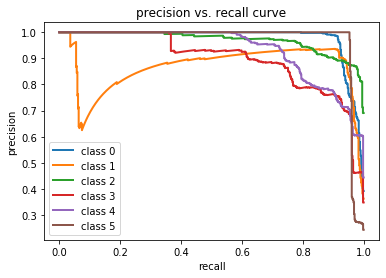

In [31]:
# precision recall curve
n_classes = 6
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        Y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

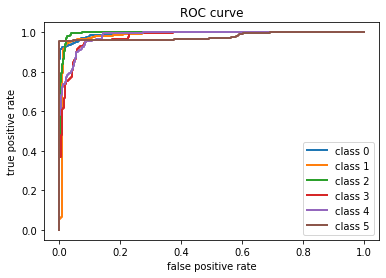

In [32]:
# roc curve
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  Y_pred[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()